In [1]:
import pandas as pd
import numpy as np

from glob import glob
from datetime import datetime

In [2]:
obdir = '/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/'

In [3]:
flist = glob(obdir + 'clean/*.pd')
for f in flist:
    print(f)

/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/PVC_2005_2019.pd
/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/CLNX_1999_2019.pd
/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/BCC_2004_2019.pd
/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/AGD_2004_2019.pd
/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/ALTA_1944_2020.pd
/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/BSNFDC_2005_2019.pd
/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/BSNFEX_2012_2019.pd
/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/BSNFJE_2005_2019.pd
/uufs/chpc.utah.edu/common/home/steenburgh-group10/mewessler/observations/clean/SLB_1915_2020.pd


In [4]:
obs = []

for f in flist:
    site = f.split('/')[-1].split('_')[0]
    print('Aggregating %s'%site)
    
    df = pd.read_pickle(f)
    df['site'] = np.full(df.index.size, fill_value=site, dtype='U10')
    
    # We can put these back later 
    df = df.drop(columns=[k for k in df.keys() if ('auto' in k)|('depth' in k)])
    
    obs.append(df.set_index([df.index, 'site']).sort_index())

obs = pd.concat(obs, sort=True).sort_index()

# We can put these back later 
periods = pd.DataFrame(obs.pop('precip_periods'))
obs.insert(obs.shape[1], 'precip_periods', periods)

print('\n', obs.shape)
obs[-1020:-1000]

Aggregating PVC
Aggregating CLNX
Aggregating BCC
Aggregating AGD
Aggregating ALTA
Aggregating BSNFDC
Aggregating BSNFEX
Aggregating BSNFJE
Aggregating SLB

 (85150, 10)


slr12      slr24    snow12_mm    snow24_mm  \
datetime_utc        site                                                 
2019-04-03 11:00:00 ALTA      NaN   11.33000          NaN    86.360001   
2019-04-03 21:00:00 CLNX     6.67    6.67000    25.400000    25.400000   
2019-04-04 09:00:00 AGD      1.00    1.00000 -2514.600098 -2514.600098   
                    CLNX      NaN        NaN     0.000000          NaN   
2019-04-04 11:00:00 ALTA      NaN        NaN          NaN     0.000000   
2019-04-04 21:00:00 CLNX      NaN        NaN     0.000000     0.000000   
2019-04-04 23:00:00 BCC      1.00    1.00000 -2514.600098 -2514.600098   
2019-04-05 09:00:00 CLNX     6.26        NaN    25.400000          NaN   
2019-04-05 10:00:00 AGD      1.00    1.00000 -2514.600098 -2514.600098   
2019-04-05 11:00:00 ALTA      NaN        NaN          NaN     0.000000   
2019-04-05 21:00:00 AGD       NaN        NaN     0.000000     0.000000   
                    CLNX      NaN    6.26000     0.000000    25.400000   
2019-04-06 00:00:00 BCC   -762.00 -762.00000 -2514.600098 -2514.600098   
2019-04-06 09:00:00 BCC  -1980.00 -550.23999 -2514.600098 -2514.600098   
                    CLNX      NaN        NaN     0.000000          NaN   
2019-04-06 11:00:00 ALTA      NaN        NaN          NaN     0.000000   
2019-04-06 21:00:00 CLNX      NaN        NaN     0.000000     0.000000   
2019-04-07 00:00:00 BCC      1.00    1.00000 -2514.600098 -2514.600098   
2019-04-07 09:00:00 AGD      1.00    1.00000 -2514.600098 -2514.600098   
                    CLNX      NaN        NaN     0.000000          NaN   

                             swe12_mm     swe24_mm  tsfc_degC  tsfc_max_degC  \
datetime_utc        site                                                       
2019-04-03 11:00:00 ALTA          NaN     7.620000       1.11           2.78   
2019-04-03 21:00:00 CLNX     3.810000     3.810000        NaN            NaN   
2019-04-04 09:00:00 AGD  -2514.600098 -2514.600098        NaN          10.00   
                    CLNX     0.000000          NaN        NaN            NaN   
2019-04-04 11:00:00 ALTA          NaN     0.000000       5.56          11.67   
2019-04-04 21:00:00 CLNX     0.000000     0.000000        NaN            NaN   
2019-04-04 23:00:00 BCC  -2514.600098 -2514.600098        NaN           8.89   
2019-04-05 09:00:00 CLNX     4.060000          NaN        NaN            NaN   
2019-04-05 10:00:00 AGD  -2514.600098 -2514.600098        NaN           7.78   
2019-04-05 11:00:00 ALTA          NaN     0.000000       2.78           6.11   
2019-04-05 21:00:00 AGD      0.000000     0.000000        NaN           3.89   
                    CLNX     0.000000     4.060000        NaN            NaN   
2019-04-06 00:00:00 BCC      3.300000     3.300000        NaN           7.78   
2019-04-06 09:00:00 BCC      1.270000     4.570000        NaN           5.00   
                    CLNX     0.000000          NaN        NaN            NaN   
2019-04-06 11:00:00 ALTA          NaN     0.000000       0.56           2.78   
2019-04-06 21:00:00 CLNX     0.000000     0.000000        NaN            NaN   
2019-04-07 00:00:00 BCC  -2514.600098 -2514.600098        NaN           5.00   
2019-04-07 09:00:00 AGD  -2514.600098 -2514.600098        NaN           6.11   
                    CLNX     0.000000          NaN        NaN            NaN   

                          tsfc_min_degC precip_periods  
datetime_utc        site                                
2019-04-03 11:00:00 ALTA          -1.11             []  
2019-04-03 21:00:00 CLNX            NaN             []  
2019-04-04 09:00:00 AGD           -1.67             []  
                    CLNX            NaN             []  
2019-04-04 11:00:00 ALTA          -3.33             []  
2019-04-04 21:00:00 CLNX            NaN             []  
2019-04-04 23:00:00 BCC           -1.11             []  
2019-04-05 09:00:00 CLNX            NaN             []  
2019-04-05 10:00:00 AGD            1.67             []  
2019-04-05 

In [5]:
obs.to_pickle(obdir + 'aggregate/WESTUS_ALL.uncut.pd')

In [6]:
# Note the ERA5 starts in 1980 - cut there
obs_cut = obs[(
    (obs.index.get_level_values(0) > datetime(1980, 1, 1, 0, 0))
    & ((obs['slr12'] > 1.) & (obs['slr12'] < 50.))
    & ((obs['slr24'] > 1.) & (obs['slr24'] < 50.))
)]

print(obs_cut.shape)
obs_cut[-1020:-1000]

(5062, 10)


slr12  slr24   snow12_mm   snow24_mm   swe12_mm  \
datetime_utc        site                                                    
2016-02-17 21:00:00 AGD    8.00   8.00   40.639999   40.639999   5.080000   
2016-02-18 09:00:00 AGD    7.45   7.46   88.900002  127.000000  11.940000   
2016-02-18 10:00:00 BCC    8.89   7.27  101.599998  101.599998  11.430000   
                    PVC    5.88   2.78   50.799999   50.799999   8.640000   
2016-02-18 21:00:00 CLNX   8.14   8.14   88.900002   88.900002  10.920000   
2016-02-22 09:00:00 AGD   10.17  10.17   80.010002   80.010002   7.870000   
                    BCC   11.55  11.55   38.099998   38.099998   3.300000   
2016-02-22 10:00:00 PVC   24.90  24.90   25.400000   25.400000   1.020000   
2016-02-22 21:00:00 CLNX  12.50  13.26  127.000000  165.100006  10.160000   
2016-02-22 22:00:00 AGD    2.58  11.14   20.320000   99.059998   7.870000   
                    AGD   19.92  11.14   20.320000   99.059998   1.020000   
2016-03-06 09:00:00 AGD    6.47   6.47   83.820000   83.820000  12.950000   
2016-03-06 21:00:00 AGD    9.44   8.20  170.179993  254.000000  18.030001   
                    CLNX   5.80   7.75  101.599998  279.399994  17.530001   
2016-03-07 00:00:00 BCC    8.93   5.43  127.000000  127.000000  14.220000   
                    BCC    8.93   5.43  127.000000  127.000000  14.220000   
                    BCC    8.93   5.43  127.000000  127.000000  14.220000   
                    PVC    4.65   1.54   50.799999   50.799999  10.920000   
2016-03-09 00:00:00 PVC   10.00  10.00   12.700000   12.700000   1.270000   
2016-03-09 09:00:00 AGD    7.51   9.52   30.480000   99.059998   4.060000   

                           swe24_mm  tsfc_degC  tsfc_max_degC  tsfc_min_degC  \
datetime_utc        site                                                       
2016-02-17 21:00:00 AGD    5.080000        NaN           6.67          -0.56   
2016-02-18 09:00:00 AGD   17.020000        NaN           2.22          -6.11   
2016-02-18 10:00:00 BCC   13.970000        NaN           4.44          -3.89   
                    PVC   18.290001        NaN           6.11          -1.67   
2016-02-18 21:00:00 CLNX  10.920000        NaN            NaN            NaN   
2016-02-22 09:00:00 AGD    7.870000        NaN          -2.78          -6.11   
                    BCC    3.300000        NaN          -0.56          -6.67   
2016-02-22 10:00:00 PVC    1.020000        NaN           0.56          -3.89   
2016-02-22 21:00:00 CLNX  12.450000        NaN            NaN            NaN   
2016-02-22 22:00:00 AGD    8.890000        NaN          -6.67         -10.56   
                    AGD    8.890000        NaN          -6.67         -10.56   
2016-03-06 09:00:00 AGD   12.950000        NaN           3.33           0.00   
2016-03-06 21:00:00 AGD   30.990000        NaN           1.11          -6.67   
                    CLNX  36.070000        NaN            NaN            NaN   
2016-03-07 00:00:00 BCC   23.370001        NaN           2.22          -3.89   
                    BCC   23.370001        NaN           2.22          -3.89   
                    BCC   23.370001        NaN           2.22          -3.89   
                    PVC   33.020000        NaN           2.78          -7.22   
2016-03-09 00:00:00 PVC    1.270000        NaN           0.56          -2.22   
2016-03-09 09:00:00 AGD   10.410000        NaN           1.11          -5.56   

                         precip_periods  
datetime_utc        site                 
2016-02-17 21:00:00 AGD              []  
2016-02-18 09:00:00 AGD              []  
2016-02-18 10:00:00 BCC              []  
                    PVC              []  
2016-02-18 21:00:00 CLNX             []  
2016-02-22 09:00:00 AGD              []  
                    BCC              []  
2016-02-22 10:00:00 PVC              []  
2016-02-22 21:00:00 CLNX             []  
2016-02-22 22:00:00 AGD              []  
                    AGD              []  
2016-03-06 09:00:00 AGD 

In [7]:
obs_cut.to_pickle(obdir + 'aggregate/WESTUS_ALL.pd')

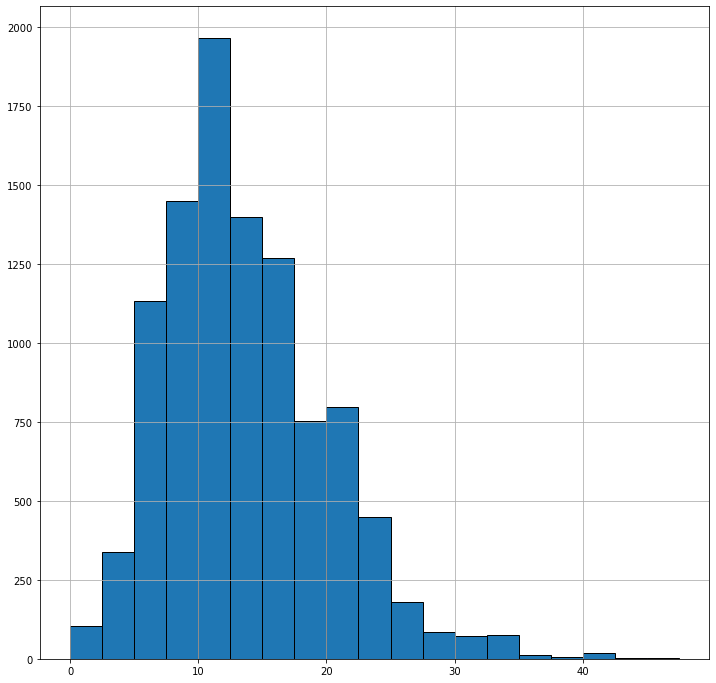

In [8]:
import matplotlib.pyplot as plt

slr = np.append(obs_cut['slr12'].dropna().values, obs_cut['slr24'].dropna().values)

plt.figure(facecolor='w', figsize=(12, 12))
plt.hist(slr, bins=np.arange(0, 50, 2.5), edgecolor='k')
plt.grid()

In [16]:
obs_indexed = obs.reset_index().set_index(['site', 'datetime_utc'])
obs_indexed

slr12  slr24  snow12_mm  snow24_mm  swe12_mm  \
site datetime_utc                                                        
SLB  1915-07-03 02:00:00    NaN    NaN        NaN        NaN       NaN   
     1915-08-01 02:00:00    NaN    NaN        NaN        NaN       NaN   
     1915-08-02 02:00:00    NaN    NaN        NaN        NaN       NaN   
     1915-08-03 02:00:00    NaN    NaN        NaN        NaN       NaN   
     1915-08-04 02:00:00    NaN    NaN        NaN        NaN       NaN   
...                         ...    ...        ...        ...       ...   
ALTA 2020-07-22 11:00:00    NaN    0.0        NaN        0.0       NaN   
     2020-07-23 11:00:00    NaN    0.0        NaN        0.0       NaN   
     2020-07-24 11:00:00    NaN    NaN        NaN        0.0       NaN   
     2020-07-25 11:00:00    NaN    NaN        NaN        0.0       NaN   
     2020-07-26 11:00:00    NaN    0.0        NaN        0.0       NaN   

                          swe24_mm  tsfc_degC  tsfc_max_degC  tsfc_min_degC  \
site datetime_utc                                                             
SLB  1915-07-03 02:00:00     10.41        NaN            NaN            NaN   
     1915-08-01 02:00:00      0.00        NaN            NaN            NaN   
     1915-08-02 02:00:00      0.00        NaN            NaN            NaN   
     1915-08-03 02:00:00      0.00        NaN            NaN            NaN   
     1915-08-04 02:00:00      0.00        NaN            NaN            NaN   
...                            ...        ...            ...            ...   
ALTA 2020-07-22 11:00:00      3.05  13.330000      22.780001          11.67   
     2020-07-23 11:00:00      0.76  16.670000      20.000000           7.78   
     2020-07-24 11:00:00      0.00  19.440001      21.110001           7.78   
     2020-07-25 11:00:00      0.00  21.670000      22.780001          10.00   
     2020-07-26 11:00:00      1.52  19.440001      23.330000           9.44   

                         precip_periods  
site datetime_utc                        
SLB  1915-07-03 02:00:00             []  
     1915-08-01 02:00:00             []  
     1915-08-02 02:00:00             []  
     1915-08-03 02:00:00             []  
     1915-08-04 02:00:00             []  
...                                 ...  
ALTA 2020-07-22 11:00:00             []  
     2020-07-23 11:00:00             []  
     2020-07-24 11:00:00             []  
     2020-07-25 11:00:00             []  
     2020-07-26 11:00:00             []  

[85150 rows x 10 columns]

In [21]:
obs_indexed.loc['CLNX']

,slr12,slr24,snow12_mm,snow24_mm,swe12_mm,swe24_mm,tsfc_degC,tsfc_max_degC,tsfc_min_degC,precip_periods
datetime_utc,,,,,,,,,,
1999-11-01 09:00:00,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,[]
1999-11-01 21:00:00,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,[]
1999-11-02 09:00:00,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,[]
1999-11-02 21:00:00,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,[]
1999-11-03 09:00:00,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...
2019-04-28 21:00:00,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,[]
2019-04-29 09:00:00,12.45,NaN,12.700000,NaN,1.020000,NaN,NaN,NaN,NaN,[]
2019-04-29 21:00:00,NaN,12.45,0.000000,12.700000,0.000000,1.020000,NaN,NaN,NaN,[]
